In [96]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string

columns = ['id', 'sentence 1', 'sentence 2', 'gold label']
training_data = '../input/mlmidterm/MLMidTerm-main/train_with_label.txt'
development_data = '../input/mlmidterm/MLMidTerm-main/dev_with_label.txt'
test_data = '../input/mlmidterm/MLMidTerm-main/test_without_label.txt'

df_test = pd.read_csv(test_data, sep = '\t+', names = ['id','sentence 1', 'sentence 2'])#.apply(lambda x: x.astype(str).str.lower())

df_dev = pd.read_csv(development_data, sep = '\t+', names = columns)#.apply(lambda x: x.astype(str).str.lower())

df_dev['gold label'] = pd.to_numeric(df_dev['gold label'], errors='coerce')
df_dev = df_dev.dropna().reset_index(drop = True)
df_dev['gold label'] = df_dev['gold label'].astype(int)

df = pd.read_csv(training_data, sep = '\t+', names = columns)#.apply(lambda x: x.astype(str).str.lower())

df['gold label'] = pd.to_numeric(df['gold label'], errors='coerce')
df = df.dropna()
df['gold label'] = df['gold label'].astype(int)

#Lists information of columns and respective data types
df.info() 
df_dev.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4077 entries, 0 to 4076
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4077 non-null   object
 1   sentence 1  4077 non-null   object
 2   sentence 2  4077 non-null   object
 3   gold label  4077 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 159.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          724 non-null    object
 1   sentence 1  724 non-null    object
 2   sentence 2  724 non-null    object
 3   gold label  724 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 22.8+ KB


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [97]:
df.head()

,id,sentence 1,sentence 2,gold label
0,train_id_0,The Democratic candidates also began announcin...,The Democratic candidates also began announcin...,1
1,train_id_1,The woman was exposed to the SARS virus while ...,The woman was exposed to the SARS virus while ...,1
2,train_id_2,He said the problem needs to be corrected befo...,He said the prob lem needs to be corrected bef...,1
3,train_id_3,A representative for Phoenix-based U-Haul decl...,"Anthony Citrano , a representative for WhenU ,...",0
4,train_id_4,The biggest threat to order seemed to be looti...,The biggest threat to order seemed to be looti...,1


In [98]:
df_dev.head()

,id,sentence 1,sentence 2,gold label
0,dev_id_0,Local police authorities are treating the expl...,Acting New Haven Police Chief Francisco Ortiz ...,0
1,dev_id_1,The report shows that drugs sold in Canadian p...,The report shows that drugs sold in Canadian p...,1
2,dev_id_2,The transition is slated to begin no later tha...,A two-week transition period will begin no lat...,1
3,dev_id_3,"Like Viacom , GE -- parent of NBC -- is also s...","Like Viacom , General Electric is seen as a le...",1
4,dev_id_4,"Last month , 62 Spanish peacekeepers died when...","In another disaster , 62 Spanish peacekeepers ...",1


In [99]:
#Count how many words are in each sentence

df['words_1'] = df['sentence 1'].str.split().str.len()
df['words_2'] = df['sentence 2'].str.split().str.len()
df['wordcount difference'] = abs(df['sentence 1'].str.split().str.len() - df['sentence 2'].str.split().str.len())


df_dev['words_1'] = df_dev['sentence 1'].str.split().str.len()
df_dev['words_2'] = df_dev['sentence 2'].str.split().str.len()
df_dev['wordcount difference'] = abs(df_dev['sentence 1'].str.split().str.len() - df_dev['sentence 2'].str.split().str.len())

df_test['words_1'] = df_test['sentence 1'].str.split().str.len()
df_test['words_2'] = df_test['sentence 2'].str.split().str.len()
df_test['wordcount difference'] = abs(df_test['sentence 1'].str.split().str.len() - df_test['sentence 2'].str.split().str.len())

df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference
0,train_id_0,The Democratic candidates also began announcin...,The Democratic candidates also began announcin...,1,23,25,2
1,train_id_1,The woman was exposed to the SARS virus while ...,The woman was exposed to the SARS virus while ...,1,35,32,3
2,train_id_2,He said the problem needs to be corrected befo...,He said the prob lem needs to be corrected bef...,1,19,17,2
3,train_id_3,A representative for Phoenix-based U-Haul decl...,"Anthony Citrano , a representative for WhenU ,...",0,19,15,4
4,train_id_4,The biggest threat to order seemed to be looti...,The biggest threat to order seemed to be looti...,1,26,30,4


In [100]:
#Find token_set_ratio using Levenshtein Distance via python package Fuzzywuzzy 

from fuzzywuzzy import fuzz
df['fuzz ratio'] = df.apply(lambda row: fuzz.ratio(row['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

df_dev['fuzz ratio'] = df_dev.apply(lambda row2: fuzz.ratio(row2['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row2['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

df_test['fuzz ratio'] = df_test.apply(lambda row2: fuzz.ratio(row2['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row2['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

In [101]:
#Find words that overlap
def getOverlap(s1,s2):
    s2 = s2.lower()
    s1 = s1.lower()
    s2List = s2.split(" ")
    s1List = s1.split(" ")
    return len(list(set(s2List)&set(s1List)))


In [102]:
df['overlapping words'] = df.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)
df_dev['overlapping words'] = df_dev.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)
df_test['overlapping words'] = df_test.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)

df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference,fuzz ratio,overlapping words
0,train_id_0,The Democratic candidates also began announcin...,The Democratic candidates also began announcin...,1,23,25,2,91,19
1,train_id_1,The woman was exposed to the SARS virus while ...,The woman was exposed to the SARS virus while ...,1,35,32,3,98,24
2,train_id_2,He said the problem needs to be corrected befo...,He said the prob lem needs to be corrected bef...,1,19,17,2,90,13
3,train_id_3,A representative for Phoenix-based U-Haul decl...,"Anthony Citrano , a representative for WhenU ,...",0,19,15,4,61,10
4,train_id_4,The biggest threat to order seemed to be looti...,The biggest threat to order seemed to be looti...,1,26,30,4,80,19


In [103]:
#Find difference in character count
df['char 1'] = df['sentence 1'].str.len()
df['char 2'] = df['sentence 2'].str.len()
df['char difference'] = abs(df['char 1'] - df['char 2'])

df_dev['char 1'] = df_dev['sentence 1'].str.len()
df_dev['char 2'] = df_dev['sentence 2'].str.len()
df_dev['char difference'] = abs(df_dev['char 1'] - df_dev['char 2'])

df_test['char 1'] = df_test['sentence 1'].str.len()
df_test['char 2'] = df_test['sentence 2'].str.len()
df_test['char difference'] = abs(df_test['char 1'] - df_test['char 2'])

In [104]:
#Using package difflib to import SequenceMatcher gestalt pattern matching

from difflib import SequenceMatcher
df['sequence matcher'] = df.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)
df_dev['sequence matcher'] = df_dev.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)
df_test['sequence matcher'] = df_test.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)

In [105]:
df['Overlapping ratio'] = df['overlapping words']/df[['words_1','words_2']].min(axis=1)*2
df_dev['Overlapping ratio'] = df_dev['overlapping words']/df_dev[['words_1','words_2']].min(axis=1)*2
df_test['Overlapping ratio'] = df_test['overlapping words']/df_test[['words_1','words_2']].min(axis=1)*2

In [106]:
df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference,fuzz ratio,overlapping words,char 1,char 2,char difference,sequence matcher,Overlapping ratio
0,train_id_0,The Democratic candidates also began announcin...,The Democratic candidates also began announcin...,1,23,25,2,91,19,167,171,4,0.893491,1.652174
1,train_id_1,The woman was exposed to the SARS virus while ...,The woman was exposed to the SARS virus while ...,1,35,32,3,98,24,167,164,3,0.972810,1.500000
2,train_id_2,He said the problem needs to be corrected befo...,He said the prob lem needs to be corrected bef...,1,19,17,2,90,13,98,87,11,0.897297,1.529412
3,train_id_3,A representative for Phoenix-based U-Haul decl...,"Anthony Citrano , a representative for WhenU ,...",0,19,15,4,61,10,116,80,36,0.602041,1.333333
4,train_id_4,The biggest threat to order seemed to be looti...,The biggest threat to order seemed to be looti...,1,26,30,4,80,19,138,161,23,0.789298,1.461538


In [107]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [108]:
import nltk 
from nltk.corpus import wordnet

def getSynonyms(s1, s2):
    synonyms = []
    antonyms = []
    synamount = 0
    antamount = 0
    w1 = set(s1.translate(str.maketrans('', '', string.punctuation)).split(" "))
    w2 = set(s2.translate(str.maketrans('', '', string.punctuation)).split(" "))
    
    for i in w1:
        for syn in wordnet.synsets(i):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
                if lemma.antonyms():
                    antonyms.append(lemma.antonyms()[0].name())
                    
    for synonym in set(synonyms):
        if synonym in w2:
            synamount += 1
            
    return synamount



In [109]:
df['synonyms'] = df.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)
df_dev['synonyms'] = df_dev.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)
df_test['synonyms'] = df_test.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)

In [110]:
df['synonym ratio'] = df['synonyms']/df[['words_1','words_2']].min(axis=1)*2
df_dev['synonym ratio'] = df_dev['synonyms']/df_dev[['words_1','words_2']].min(axis=1)*2
df_test['synonym ratio'] = df_test['synonyms']/df_test[['words_1','words_2']].min(axis=1)*2

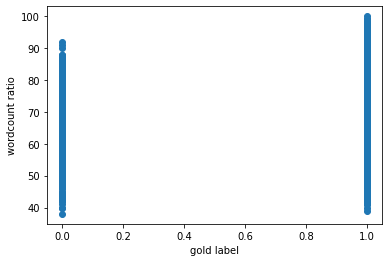

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['gold label'], df['fuzz ratio'])

plt.xlabel('gold label')
plt.ylabel('wordcount ratio')
 
plt.show()

In [192]:
#development
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#features = ['wordcount difference', 'fuzz ratio', 'overlapping words', 'char difference', 'sequence matcher', 'wordcount ratio', 'synonyms', 'synonym ratio']
features = ['wordcount difference', 'sequence matcher', 'Overlapping ratio', 'synonym ratio']
X_train = df[features]
X_dev = df_dev[features]
y_train = df['gold label']
y_dev = df_dev['gold label']

classifier = make_pipeline(StandardScaler(), svm.SVC(kernel = 'rbf', gamma = 1, C = 1, class_weight = 'balanced'))
#classifier = make_pipeline(StandardScaler(), svm.SVC())
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_dev)

print(classifier.score(X_dev, y_dev))


0.7209944751381215


In [113]:
df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference,fuzz ratio,overlapping words,char 1,char 2,char difference,sequence matcher,Overlapping ratio,synonyms,synonym ratio
0,train_id_0,The Democratic candidates also began announcin...,The Democratic candidates also began announcin...,1,23,25,2,91,19,167,171,4,0.893491,1.652174,6,0.521739
1,train_id_1,The woman was exposed to the SARS virus while ...,The woman was exposed to the SARS virus while ...,1,35,32,3,98,24,167,164,3,0.972810,1.500000,18,1.125000
2,train_id_2,He said the problem needs to be corrected befo...,He said the prob lem needs to be corrected bef...,1,19,17,2,90,13,98,87,11,0.897297,1.529412,10,1.176471
3,train_id_3,A representative for Phoenix-based U-Haul decl...,"Anthony Citrano , a representative for WhenU ,...",0,19,15,4,61,10,116,80,36,0.602041,1.333333,5,0.666667
4,train_id_4,The biggest threat to order seemed to be looti...,The biggest threat to order seemed to be looti...,1,26,30,4,80,19,138,161,23,0.789298,1.461538,8,0.615385


In [114]:
df_dev.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference,fuzz ratio,overlapping words,char 1,char 2,char difference,sequence matcher,Overlapping ratio,synonyms,synonym ratio
0,dev_id_0,Local police authorities are treating the expl...,Acting New Haven Police Chief Francisco Ortiz ...,0,18,18,0,60,9,105,108,3,0.563380,1.000000,6,0.666667
1,dev_id_1,The report shows that drugs sold in Canadian p...,The report shows that drugs sold in Canadian p...,1,25,31,6,81,18,149,183,34,0.807229,1.440000,10,0.800000
2,dev_id_2,The transition is slated to begin no later tha...,A two-week transition period will begin no lat...,1,15,12,3,69,8,70,62,8,0.681818,1.333333,6,1.000000
3,dev_id_3,"Like Viacom , GE -- parent of NBC -- is also s...","Like Viacom , General Electric is seen as a le...",1,26,18,8,79,15,124,102,22,0.778761,1.666667,6,0.666667
4,dev_id_4,"Last month , 62 Spanish peacekeepers died when...","In another disaster , 62 Spanish peacekeepers ...",1,19,22,3,73,13,106,119,13,0.728889,1.368421,7,0.736842


In [159]:
from sklearn.linear_model import LogisticRegression
#features = ['wordcount difference', 'fuzz ratio', 'char difference', 'Overlapping ratio', 'synonyms', 'synonym ratio', 'sequence matcher']
features = ['wordcount difference', 'fuzz ratio', 'char difference', 'Overlapping ratio', 'synonyms', 'synonym ratio', 'sequence matcher']
X_train = df[features]
X_dev = df_dev[features]
y_train = df['gold label']
y_dev = df_dev['gold label']

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_dev)

print(lr.score(X_dev,y_dev))

X_test = df_test[features]
y_test_pred = lr.predict(X_test)

0.6546961325966851


In [116]:
for i in range(df_dev.shape[0]):
    print(df_dev.loc[i,'id'],"\t",y_pred[i])

dev_id_0 	 1
dev_id_1 	 1
dev_id_2 	 1
dev_id_3 	 1
dev_id_4 	 1
dev_id_5 	 0
dev_id_6 	 1
dev_id_7 	 0
dev_id_8 	 0
dev_id_9 	 1
dev_id_10 	 1
dev_id_11 	 1
dev_id_12 	 1
dev_id_13 	 1
dev_id_14 	 1
dev_id_15 	 1
dev_id_16 	 0
dev_id_17 	 1
dev_id_18 	 1
dev_id_19 	 1
dev_id_20 	 1
dev_id_21 	 1
dev_id_22 	 1
dev_id_23 	 0
dev_id_24 	 1
dev_id_25 	 1
dev_id_26 	 1
dev_id_27 	 1
dev_id_28 	 0
dev_id_29 	 1
dev_id_30 	 1
dev_id_31 	 1
dev_id_32 	 1
dev_id_33 	 1
dev_id_34 	 1
dev_id_35 	 0
dev_id_36 	 1
dev_id_37 	 1
dev_id_38 	 1
dev_id_39 	 1
dev_id_40 	 1
dev_id_41 	 0
dev_id_42 	 1
dev_id_43 	 1
dev_id_44 	 1
dev_id_45 	 1
dev_id_46 	 1
dev_id_47 	 1
dev_id_48 	 0
dev_id_49 	 1
dev_id_50 	 1
dev_id_51 	 1
dev_id_52 	 1
dev_id_53 	 1
dev_id_54 	 1
dev_id_55 	 1
dev_id_56 	 0
dev_id_57 	 1
dev_id_58 	 1
dev_id_59 	 1
dev_id_60 	 1
dev_id_61 	 1
dev_id_62 	 1
dev_id_63 	 1
dev_id_64 	 1
dev_id_65 	 1
dev_id_66 	 1
dev_id_67 	 1
dev_id_68 	 1
dev_id_69 	 0
dev_id_70 	 1
dev_id_71 	 0
de

In [194]:
file = open('SiddarthSrinivasan_final_test_result.txt',"w")
df_test.reindex()
for i in range(df_test.shape[0]):
    print(df_test.loc[i,'id'],"\t",y_test_pred[i],file = file)
file.close()